In [1]:
#  Importing Libraries

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  Loading Dataset


df = pd.read_csv("zomato_dataset.csv")
df.head()


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [3]:
#  Standardizing  Column Names

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")



In [4]:
# Removing Duplicate Values

df.drop_duplicates(inplace=True)
df.shape


(101530, 12)

In [5]:
#  Cleaning Text Columns

text_cols = df.select_dtypes(include=['object']).columns

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)




In [6]:
#  Fixing the  best_seller

df["best_seller"] = df["best_seller"].replace({
    "BESTSELLER": "bestseller",
    "MUST TRY": "must_try",
    "nan": np.nan,
    "NaN": np.nan
})



In [7]:
# Converting  numeric fields

numeric_cols = ["dining_rating", "delivery_rating", "dining_votes", "delivery_votes", "votes", "prices"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")




In [8]:
# Remove rows missing critical fields

df.dropna(subset=["restaurant_name", "item_name", "cuisine", "city"], inplace=True)



In [9]:
# Fill numeric columns with median
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())




In [10]:
#  Standardizing the city and place name

df["city"] = df["city"].astype(str).str.title()
df["place_name"] = df["place_name"].astype(str).str.title()

df.head()


,restaurant_name,dining_rating,delivery_rating,dining_votes,delivery_votes,cuisine,place_name,city,item_name,best_seller,votes,prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,bestseller,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,bestseller,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,bestseller,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,must_try,31,205.0


In [11]:

#  Generate the cleaning report

report = {
    "original_shape": (101530, 12),
    "cleaned_shape": df.shape,
    "missing_values_after_cleaning": df.isnull().sum().to_dict(),
    "columns": list(df.columns)
}


with open("cleaning_report.json", "w") as f:
    json.dump(report, f, indent=4)

print("Cleaning report saved as cleaning_report.json")
report


Cleaning report saved as cleaning_report.json


{'original_shape': (101530, 12),
 'cleaned_shape': (101530, 12),
 'missing_values_after_cleaning': {'restaurant_name': 0,
  'dining_rating': 0,
  'delivery_rating': 0,
  'dining_votes': 0,
  'delivery_votes': 0,
  'cuisine': 0,
  'place_name': 0,
  'city': 0,
  'item_name': 0,
  'best_seller': 82387,
  'votes': 0,
  'prices': 0},
 'columns': ['restaurant_name',
  'dining_rating',
  'delivery_rating',
  'dining_votes',
  'delivery_votes',
  'cuisine',
  'place_name',
  'city',
  'item_name',
  'best_seller',
  'votes',
  'prices']}

In [12]:
# Exporting the cleaned Dataset

cleaned_filename = "cleaned_zomato_dataset.csv"
df.to_csv(cleaned_filename, index=False)

print(f"Cleaned dataset saved as {cleaned_filename}")


Cleaned dataset saved as cleaned_zomato_dataset.csv


In [13]:
#  Downloading the Cleaned Files and Report

from google.colab import files

files.download("cleaned_zomato_dataset.csv")
files.download("cleaning_report.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
#  Before & After Preview


# Load raw file again for preview
raw_df = pd.read_csv("zomato_dataset.csv")

print("RAW DATA (First 5 rows):")
display(raw_df.head())

print("\nCLEANED DATA (First 5 rows):")
display(df.head())


RAW DATA (First 5 rows):


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0



CLEANED DATA (First 5 rows):


,restaurant_name,dining_rating,delivery_rating,dining_votes,delivery_votes,cuisine,place_name,city,item_name,best_seller,votes,prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,bestseller,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,bestseller,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,bestseller,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,must_try,31,205.0


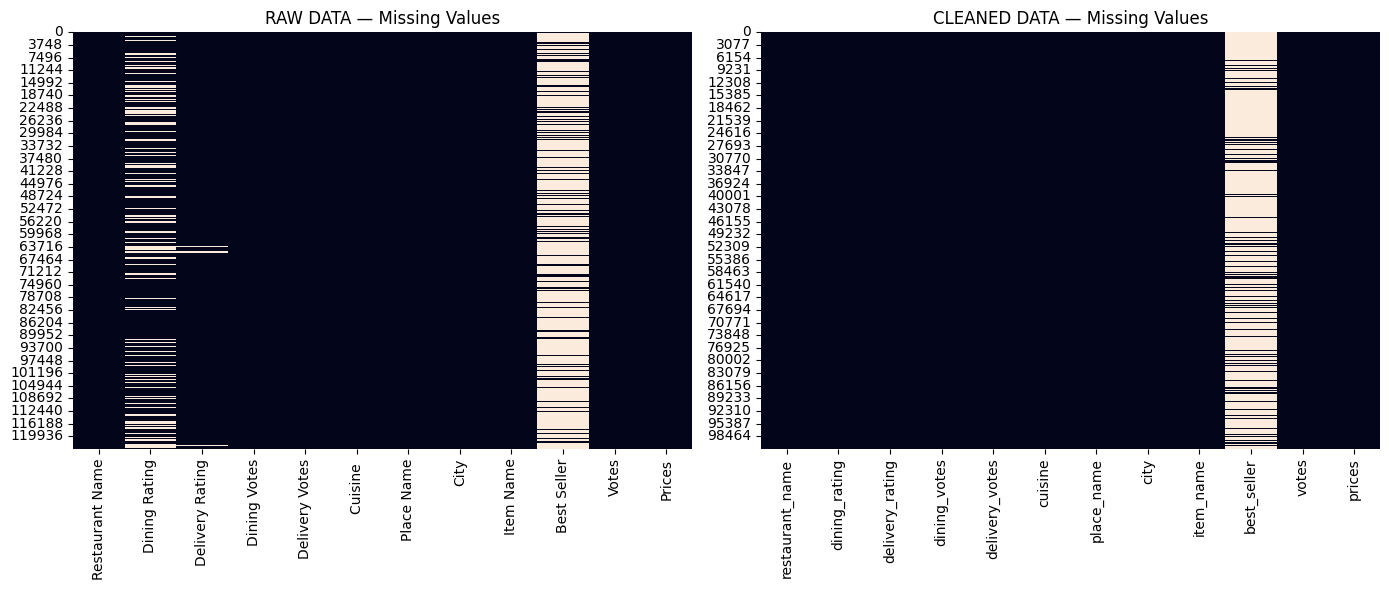

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# Portfolio_Before_After.png

raw_path = "/content/zomato_dataset.csv"
clean_path = "/content/cleaned_zomato_dataset.csv"

raw_df = pd.read_csv(raw_path)
clean_df = pd.read_csv(clean_path)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.heatmap(raw_df.isnull(), cbar=False)
plt.title("RAW DATA — Missing Values")

plt.subplot(1,2,2)
sns.heatmap(clean_df.isnull(), cbar=False)
plt.title("CLEANED DATA — Missing Values")

plt.tight_layout()

# Save image
output_path = "portfolio_before_after.png"
plt.savefig(output_path, dpi=300)

# Show the image in notebook
plt.show()

# Download the image
files.download(output_path)


In [15]:
#  Checking the diffrence between raw and cleaned Dataset

print("Raw Shape:", raw_df.shape)
print("Cleaned Shape:", df.shape)


Raw Shape: (123657, 12)
Cleaned Shape: (101530, 12)
